In [1]:
from htmd import *
%pylab inline
import time


Please cite -- HTMD: High-Throughput Molecular Dynamics for Molecular Discovery
J. Chem. Theory Comput., 2016, 12 (4), pp 1845-1852. 
http://pubs.acs.org/doi/abs/10.1021/acs.jctc.6b00049



Using Anaconda Cloud api site https://api.anaconda.org


You are on the latest HTMD version (unpackaged : /shared/adria/htmd/htmd).

Populating the interactive namespace from numpy and matplotlib


/shared/adria/miniconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
fsims = simlist(glob('/shared/adria/2ov5/adaptive_open/batches/1/filtered/*/'), '/shared/adria/2ov5/adaptive_open/batches/1/filtered/filtered.pdb')
mol = Molecule(fsims[0])


Creating simlist: 100% (2179/2179) [###############################] eta 00:00 \


In [3]:
metr = Metric(fsims)
metr.projection(MetricDihedral())
data = metr.project()
data.fstep = 0.1

2017-01-19 17:07:51,106 - htmd.projections.metric - WARNING - Projection method is deprecated. Use the .set() method of Metric instead.


Projecting trajectories: 100% (2179/2179) [########################] eta 00:01 \


2017-01-19 17:11:48,825 - htmd.projections.metric - WARNING - Multiple framesteps [0.0, 0.1] ns were read from the simulations. Taking the statistical mode: 0.1ns. If it looks wrong, you can modify it by manually setting the MetricData.fstep property.


In [4]:
tica = TICA(data, 20)
datatica = tica.project(3)

In [5]:
datatica2 = datatica.copy()


In [6]:
from htmd.clustering.regular import RegCluster
from htmd.clustering.kcenters import KCenter
#datatica2.cluster(RegCluster(radius = 0.5))

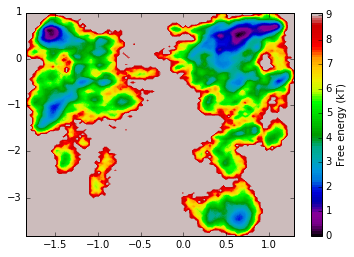

In [7]:
import pyemma
import pyemma.plots as mplt
mplt.plot_free_energy(np.vstack(datatica.dat)[:,0], np.vstack(datatica.dat)[:,1]);


In [8]:
### KMeans
t0 = time.time()
datatica.cluster(MiniBatchKMeans(n_clusters=1000))
print('Time :'+str(time.time()-t0)+' seconds')

Time :33.406769037246704 seconds


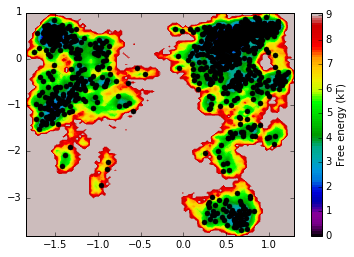

In [9]:
mplt.plot_free_energy(np.vstack(datatica.dat)[:,0], np.vstack(datatica.dat)[:,1])
cc_x = datatica.Centers[:,0]
cc_y = datatica.Centers[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')

In [10]:
## Regular Clustering
t0 = time.time()
cluster2 = RegCluster(radius= 0.21)
cluster2.fit(np.vstack(datatica2.dat))
print('Time :'+str(time.time()-t0)+' seconds')

Time :58.16138696670532 seconds


In [11]:
## Regular Clustering using KCenter to calculate the radius for n_clusters
t0 = time.time()
cluster4 = RegCluster(n_clusters=1000)
cluster4.fit(np.vstack(datatica2.dat))
print('Time :'+str(time.time()-t0)+' seconds')

100% (1000/1000) [#################################################] eta 00:01 /

2017-01-19 17:17:27,547 - htmd.clustering.regular - INFO - Estimated radius = 0.20441733820922686



Time :75.77765560150146 seconds


Number of clusters: 940


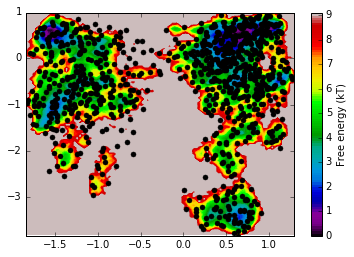

In [12]:
print('Number of clusters: '+str(len(cluster2.cluster_centers_)))
mplt.plot_free_energy(np.vstack(datatica2.dat)[:,0], np.vstack(datatica2.dat)[:,1])
cc_x = np.array(cluster2.cluster_centers_)[:,0]
cc_y = np.array(cluster2.cluster_centers_)[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')

In [13]:
### KCenters
t0 = time.time()
cluster3 = KCenter(1000)
cluster3.fit(np.vstack(datatica2.dat))
print('Time :'+str(time.time()-t0)+' seconds')

100% (1000/1000) [#################################################] eta 00:01 -
Time :28.956483364105225 seconds


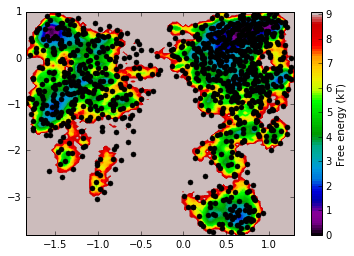

In [14]:
mplt.plot_free_energy(np.vstack(datatica2.dat)[:,0], np.vstack(datatica2.dat)[:,1])
cc_x = np.array(cluster3.cluster_centers_)[:,0]
cc_y = np.array(cluster3.cluster_centers_)[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')


In [15]:
txtfile = open("/shared/adria/tmp/s3.txt")
import time
dataset = []
for line in txtfile:
    newline = line.strip().split('    ')
    dataset.append([int(newline[0]),int(newline[1])])


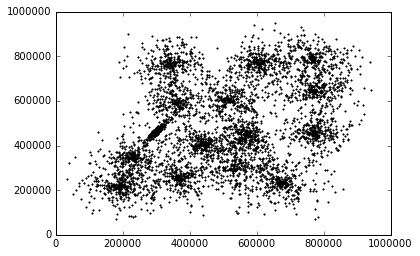

In [16]:
### Initial Dataset

x=[]
y=[]
for tup in dataset:
    x.append(tup[0])
    y.append(tup[1])
plot(x,y, linewidth=0,marker='o', markersize=1.5, color='black')

In [24]:
#### K Means

kmeans = MiniBatchKMeans(n_clusters=1000)
clustered = kmeans.fit(np.array(dataset))



/shared/adria/miniconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1279: DeprecationWarning: This function is deprecated. Please call randint(0, 4999 + 1) instead
  0, n_samples - 1, init_size)
/shared/adria/miniconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1300: RuntimeWarning: init_size=300 should be larger than k=1000. Setting it to 3*k
  init_size=init_size)
/shared/adria/miniconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 4999 + 1) instead
  0, n_samples - 1, init_size)
/shared/adria/miniconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 4999 + 1) instead
  0, n_samples - 1, init_size)
/shared/adria/miniconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 4999 + 1) instead
  0, n_samples

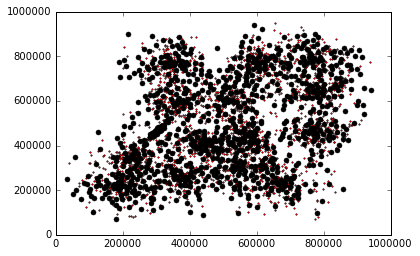

In [18]:
cc_x = np.array(clustered.cluster_centers_)[:,0]
cc_y = np.array(clustered.cluster_centers_)[:,1]
plot(x,y, linewidth=0,marker='o', markersize=1.5, color='red')
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')

In [19]:
### Regular Clustering

cluster_txt2 = RegCluster(radius= 15000)
cluster_txt2.fit(np.array(dataset))


Number of clusters: 993


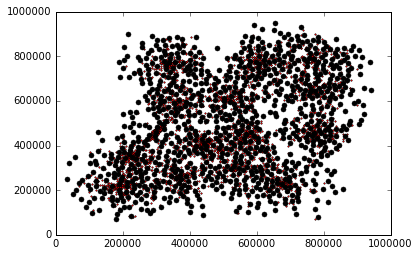

In [20]:
print('Number of clusters: '+str(len(cluster_txt2.cluster_centers_)))
cc_x = np.array(cluster_txt2.cluster_centers_)[:,0]
cc_y = np.array(cluster_txt2.cluster_centers_)[:,1]
plot(x,y, linewidth=0,marker='o', markersize=1.5, color='red')
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')

In [21]:
### K Centers

cluster_txt3 = KCenter(1000)
cluster_txt3.fit(np.array(dataset))


100% (1000/1000) [#################################################] eta 00:01 |


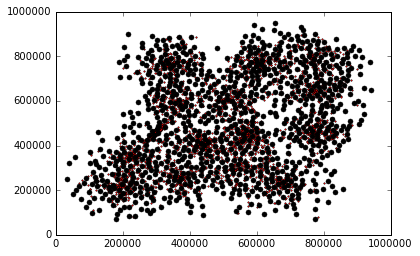

In [22]:
cc_x = np.array(cluster_txt3.cluster_centers_)[:,0]
cc_y = np.array(cluster_txt3.cluster_centers_)[:,1]
plot(x,y, linewidth=0,marker='o', markersize=1.5, color='red')
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')